<a href="https://colab.research.google.com/github/Evans0p/team-artistic-algorithm-airbnb/blob/main/Team_Artistic_Algorithm_Airbnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.**

**This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. **

###**Define the Problem**
** Explore and analyze the data to discover key understandings (not limited to these) such as : **
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## **Breakdown of this Notebook:**

1.**Importing Libraries**

2.**Loading the dataset**

3.**Data Cleaning:**

*   Examine null values.
*   Cleaning individual columns.
*   Remove the Null values from the dataset
*   Some Transformations

4.**Data Analysis and Visualization:** Using plots to find relations between the features
*   Observation 1
*   Observation 2
*   Observation 3
*   Observation 4
*   Observation 5
*   Observation 6
*   Observation 7

5.**Conclusions**


In [ ]:
# importing necessary libraries for future analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [ ]:
# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [ ]:
# Now lets mount our drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the data from the drive and reading the cs file.
file_path = '/content/drive/MyDrive/EDA CAPSTONE PROJECT-AIRBNB/Copy of Airbnb NYC 2019.csv'
airbnb=pd.read_csv(file_path)

In [ ]:
# Lets view data
airbnb.head(2)

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   
1  2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355

In [ ]:
# Lets see the length of dataset we are working with. .
len(airbnb)

48895

In [ ]:
# Lets check the information of the airbnb data
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Understanding the Data.
Ok, so we can see our dataset has 48895 data and 16 columns. Lets try to understand about the columns we've got here.

id : a unique id identifying an airbnb lisitng

name : name representating the accomodation of person

host_id : a unique id identifying an airbnb host

host_name : name under which host is registered

neighbourhood_group : a group of area

neighbourhood : area falls under neighbourhood_group

latitude : coordinate of listing

longitude : coordinate of listing

room_type : type to categorize listing rooms

price : price of listing

minimum_nights : the minimum people stay in hotel.

number_of_reviews : reviews given by visitors

last_review : date of last review given

reviews_per_month : rate of reviews given per month

calculated_host_listings_count : total no of listing registered under the host

availability_365 : the number of days for which a room is available in a year.


In [ ]:
# So these information gives us an idea of our work with different data types no. of rows and columns.

# **Cleaning dataset**

In [ ]:
#Examining missing/null values in our dataset.

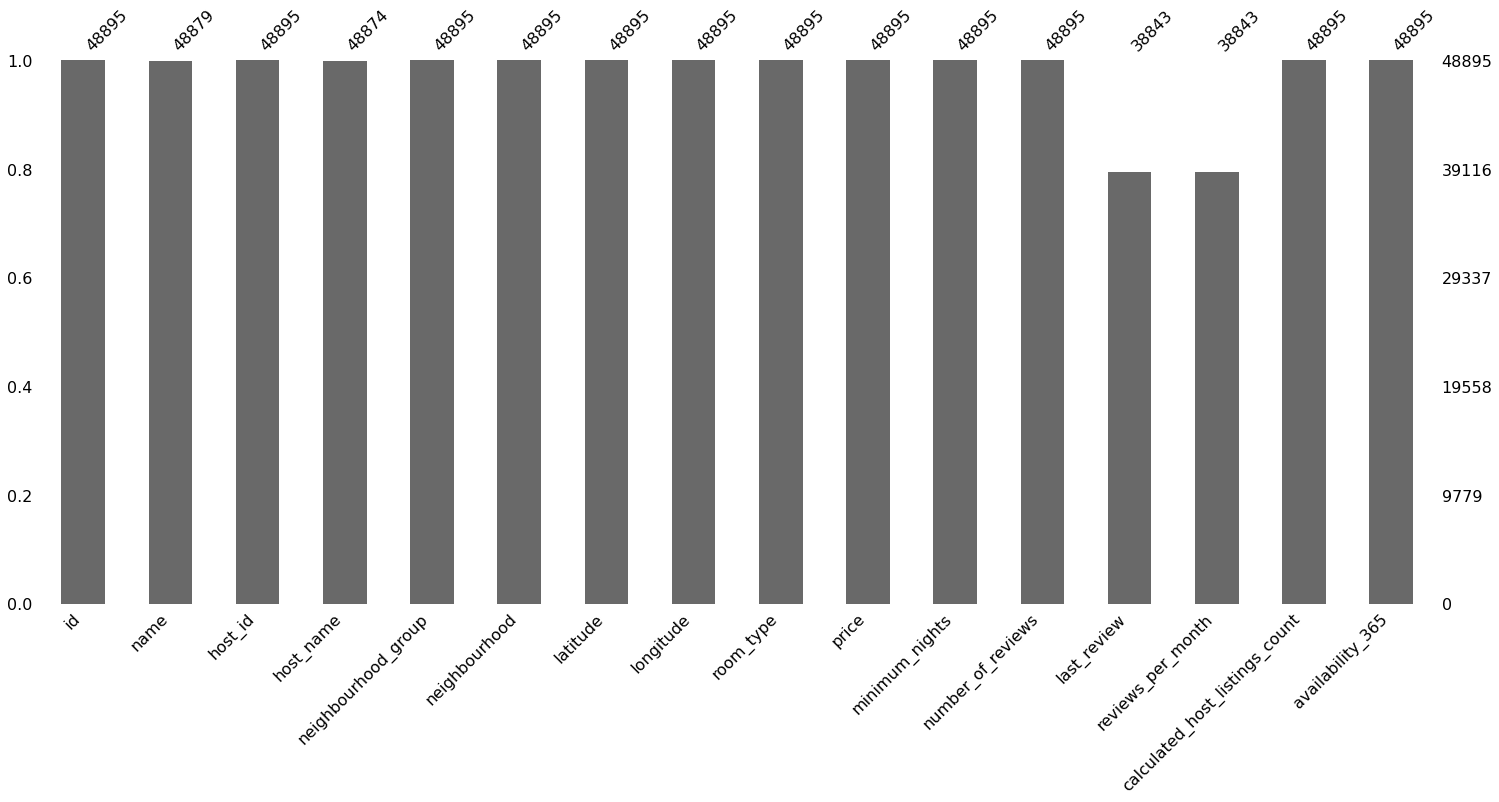

In [ ]:
#Lets plot a bar chart for giving some details of missing values
msno.bar(airbnb)

**The Bar graph shows us missing values are more in last_review and reviews_per_month column**

**Now lets check number of null values in all columns**

In [ ]:
#We use here 'sum' function to show us how many nulls are found in each column in dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Calculating the null values in percentage.
percent_missing = airbnb.isnull().sum() * 100 / len(airbnb)
missing_value_df = pd.DataFrame({'column_name': airbnb.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  \
id                                                          id   
name                                                      name   
host_id                                                host_id   
host_name                                            host_name   
neighbourhood_group                        neighbourhood_group   
neighbourhood                                    neighbourhood   
latitude                                              latitude   
longitude                                            longitude   
room_type                                            room_type   
price                                                    price   
minimum_nights                                  minimum_nights   
number_of_reviews                            number_of_reviews   
last_review                                        last_review   
reviews_per_month                            reviews_per_month   
calculated_host_listings_count  calculated_host_listings_count   
availability_365                              availability_365   

                                percent_missing  
id                                     0.000000  
name                                   0.032723  
host_id                                0.000000  
host_name                              0.042949  
neighbourhood_group                    0.000000  
neighbourhood                          0.000000  
latitude                               0.000000  
longitude                              0.000000  
room_type                              0.000000  
price                                  0.000000  
minimum_nights                         0.000000  
number_of_reviews                      0.000000  
last_review                           20.558339  
reviews_per_month                     20.558339  
calculated_host_listings_count         0.000000  
availability_365                       0.000000

**We can see that last review and reviews per month has highest number of missing values of about 20.5 percentage. Also, looking towards the data of last_review it just gives us the date of last review. So, we could neglect it. Whereas for "review_per_month" column we can simply append it with 0.0 for missing values.**

**As we have examine null values in our dataset lets clean and filter our dataset.**

In [ ]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
airbnb.drop(['last_review'], axis=1, inplace=True)
#examing the changes
airbnb.head(3)

id                                 name  host_id  host_name  \
0  2539   Clean & quiet apt home by the park     2787       John   
1  2595                Skylit Midtown Castle     2845   Jennifer   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0                NaN   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365

In [ ]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

In [ ]:
# Now replacing na values in name and host name with "Missing_Name"
airbnb["host_name"].fillna("Missing_Name", inplace = True)
#examing changes
airbnb.host_name.isnull().sum()

0

In [ ]:
# Now replacing na values in host name with "Missing"
airbnb["name"].fillna("Missing", inplace = True)
#examing changes
airbnb.name.isnull().sum()

0

In [ ]:
#lets confirm our dataset has no null values now.
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

**As we confirm our dataset has no values let us save the clean dataset in csv format.**

In [ ]:
airbnb.to_csv('/content/drive/MyDrive/Airbnb Bookings Analysis - EDA Capstone Project by Chandan.csv',index=False)

#Exploratory Data Analysis

Now that we are ready for an exploration of our data, we can make a rule that we are going to be working from left to right. The reason some may prefer to do this is due to its set approach - some datasets have a big number of attributes, plus this way we will remember to explore each column individually to make sure we learn as much as we can about our dataset.

In [ ]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})

##observation 1 

In [ ]:
top_host=airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [ ]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'host_id','host_id':'count'},inplace=True)
top_host_df

host_id  count
0  219517861    327
1  107434423    232
2   30283594    121
3  137358866    103
4   16098958     96
5   12243051     96
6   61391963     91
7   22541573     87
8  200380610     65
9    7503643     52

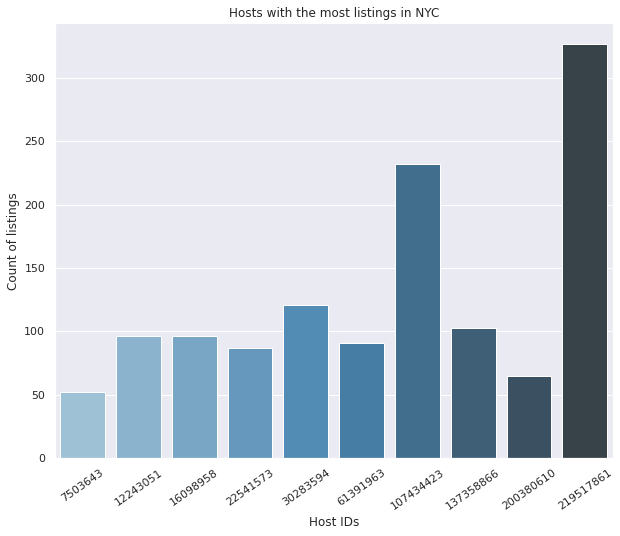

In [ ]:
fig=sns.barplot(x='host_id',y="count",data=top_host_df,palette='Blues_d')
fig.set_title('Hosts with the most listings in NYC')
fig.set_ylabel('Count of listings')
fig.set_xlabel('Host IDs')
fig.set_xticklabels(fig.get_xticklabels(), rotation=35)
sns.set_style('white')

Interesting, we can see that there is a good distribution between top 10 hosts with the most listings of about 350+. Host_id with 219517861 has more than 300+ listings.

##observation 2

In [ ]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
airbnb['room_type'].value_counts()


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

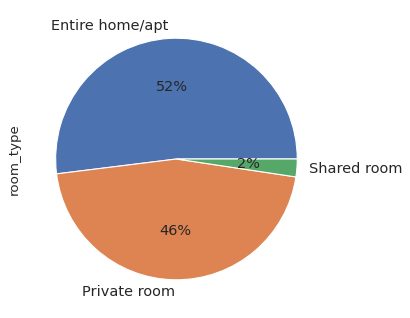

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=80)
airbnb['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)
plt.show()

Entire Home apartment property are more in Airbnb NYC

##observation 3

Lets check our Price Column which is the most important Key performer for every business to run. Lets check whats the minimum and maximum price of any room types.

In [ ]:
airbnb['price'].min()

0

In [ ]:
airbnb['price'].max()

10000

As we found that minimum price is zero which is practically impossible lets filter out these rows and Airbnb is to make business. So practically there could not be zero price. 

In [ ]:
# removing price value as 0 as practically its not possible. So droping rows with price as zero.
price_without_zero = airbnb[(airbnb['price'] > 0)]
price_without_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48884 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48884 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  reviews_per_month               

**Now as we filter are price from zero price value. Lets check for any outliers in price column as its the most important column for our analysis for which we need to be cautious for our future analysis**.

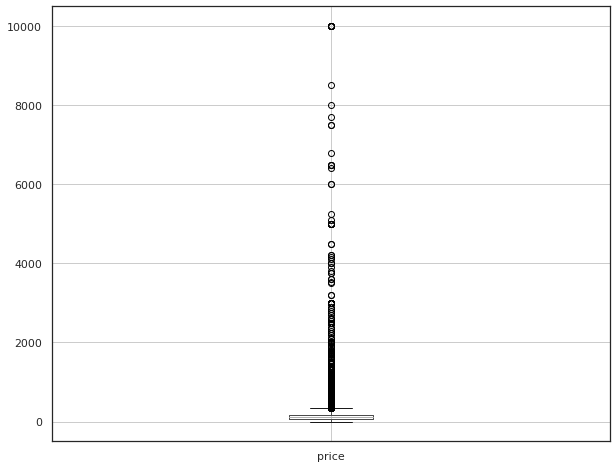

In [ ]:
# checking for any outliers in price.
airbnb.boxplot(column=['price'])
plt.show()

So from above graph we could observe some outliers present in our dataset in prices. So to remove the outlier lets define a function for it.

In [ ]:

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
price_without_outlier=remove_outlier(price_without_zero ,'price')

In [ ]:
result = price_without_outlier.groupby('room_type').agg({'price': ['mean', 'min', 'max']})  
result

price         
                       mean min  max
room_type                           
Entire home/apt  162.503731  10  333
Private room      79.043658  10  333
Shared room       59.397887  10  320

### Observation 3.a

Price Distribution at various Neighbourhood.

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

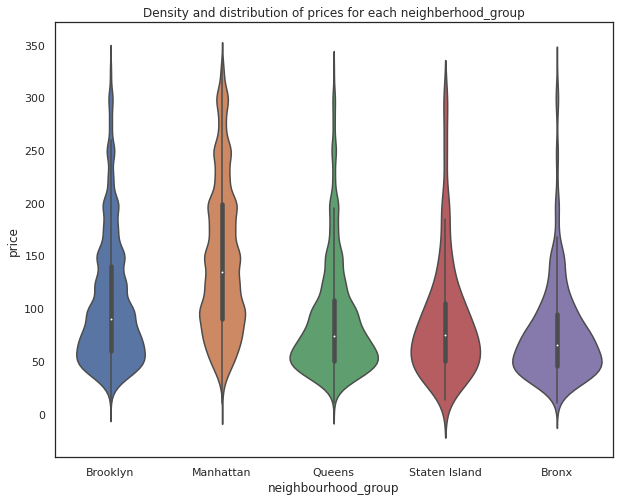

In [ ]:
fig2=sns.violinplot(x='neighbourhood_group',y=price_without_outlier['price'],data=airbnb)
fig2.set_title('Density and distribution of prices for each neighberhood_group')

'''great with the help of viloin plot with ignoring outliners its clear that the Booking cost of room in  Manhattan is 140 dollar per night as average distribution, followed by brooklyn with the average cost of 90 dollar per night. on the other hand Queens and Staten island have almost same living price as approx 75 dollar per night, futhermore Bronx is cheapest amongst them all.Even our observation somehow match the real world analysis because Manhattan belongs to expensive places to live in Newyork. '''

### observation 3.b

Price Distribution with various room types for entire NYC

In [ ]:
# For checking the price at entire newyork we will simply plot a voilin graph to make findig of average price\n
#of each types or rooms.

Text(0.5, 1.0, 'Violin plot of room type with respect to price')

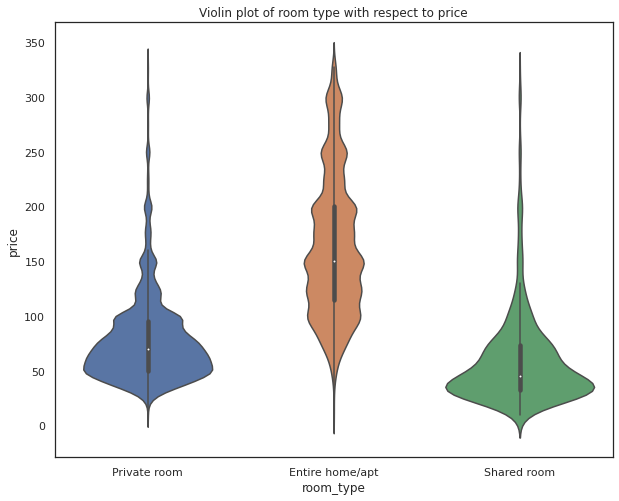

In [ ]:
# lets run the code for it.
fig = sns.violinplot(x="room_type", y='price', data= price_without_outlier)
fig.set_title('Violin plot of room type with respect to price')

Ohk! As expected these shows that Entire Room/apt average price is of 140 dollar and Private room type is of 75 USD while shared room is just 45 USD.

##observation 4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


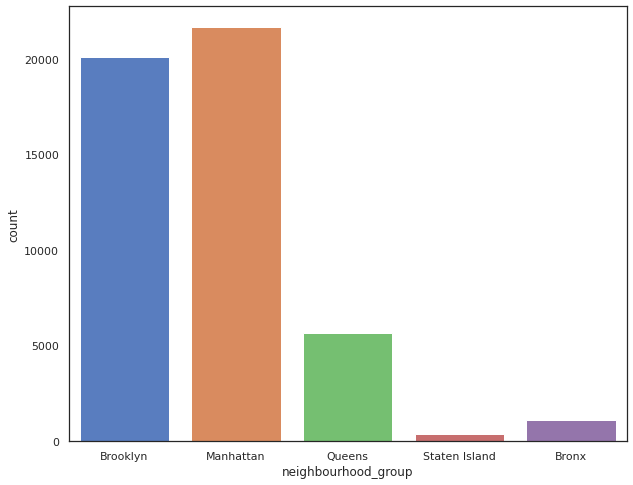

In [ ]:

ax = sns.countplot(airbnb.neighbourhood_group,palette="muted")
plt.show()

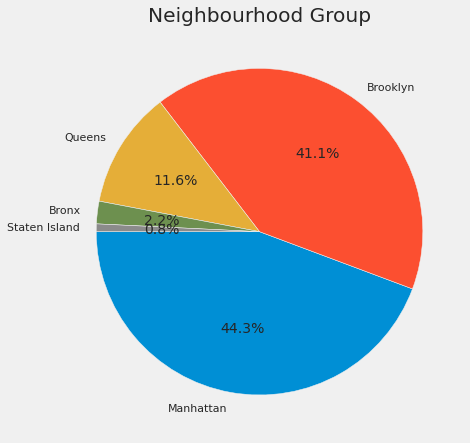

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(airbnb.neighbourhood_group.value_counts(), labels=airbnb.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

The following both plot represents the count of Airbnb's in the different neighbourhood groups. From the plot, we can easily visualize that maximum number of counts are  listed on Airbnb is in Manhatten.

##observation 5

In [ ]:
import plotly.express as px
fig = px.scatter_mapbox(
    airbnb, 
    lat='latitude',
    lon='longitude',
    width=900,  # Width of map
    height=600,  # Height of map
    color="room_type",# for different type of rooms.
    hover_data=["price"],  # Display price of property while moving mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

Thats great to see we just gave a map with various prices and room types. Which helps to find the prices of rooms at various location and its types. 

In [ ]:
airbnb.groupby('neighbourhood_group').apply(lambda x: x["room_type"].value_counts()).reset_index()

neighbourhood_group          level_1  room_type
0                Bronx     Private room        652
1                Bronx  Entire home/apt        379
2                Bronx      Shared room         60
3             Brooklyn     Private room      10132
4             Brooklyn  Entire home/apt       9559
5             Brooklyn      Shared room        413
6            Manhattan  Entire home/apt      13199
7            Manhattan     Private room       7982
8            Manhattan      Shared room        480
9               Queens     Private room       3372
10              Queens  Entire home/apt       2096
11              Queens      Shared room        198
12       Staten Island     Private room        188
13       Staten Island  Entire home/apt        176
14       Staten Island      Shared room          9

## observation 6

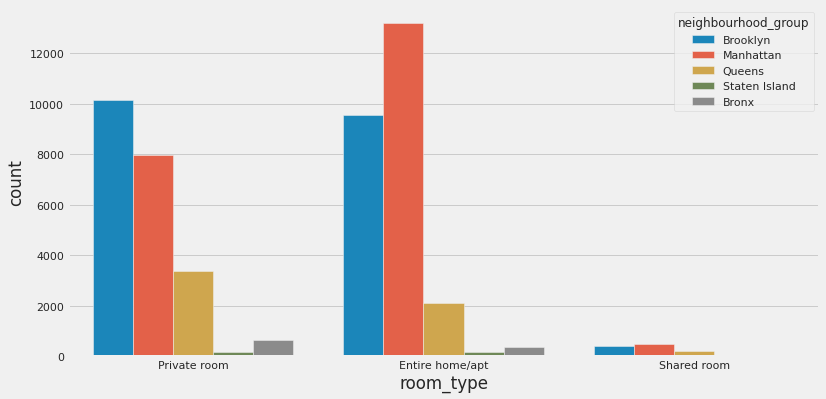

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = airbnb, x = 'room_type', hue = 'neighbourhood_group')
plt.show()

Now we could see the various types of rooms available in Neighbourhood groups. Which shows us that Manhatten has highest number of entire apartment while Brooklyn leads in private rooms.

## observation 7

Let us check what avability_365 has to speak from its data.

In [ ]:
airbnb['availability_365'].max()

365

In [ ]:
airbnb['availability_365'].min()

0

Wait! Havin rooms zero avability over a period of year may not be some what possible. So we filter it.

In [ ]:
avability_df=airbnb[airbnb['availability_365']!=0]

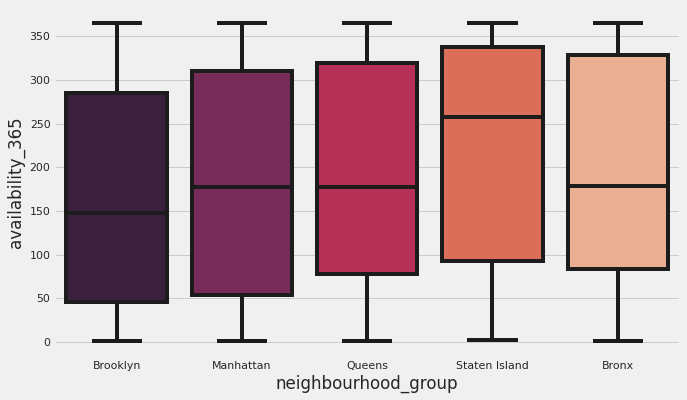

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=avability_df, x='neighbourhood_group',y='availability_365',palette='rocket')

Oh! we just find that Brooklyn, the second highest listing of people in booking in NYC has less number of avability throughout the year and State Island has the highest. Which states that Staten island is less liked by people to stay.





##observation 8

Lets check what number of minimum stay people like to live in different rooms.

In [ ]:
# grouping room_type with miniumim nights and getting its means would give us an inference.

Text(0, 0.5, 'Min Stays')

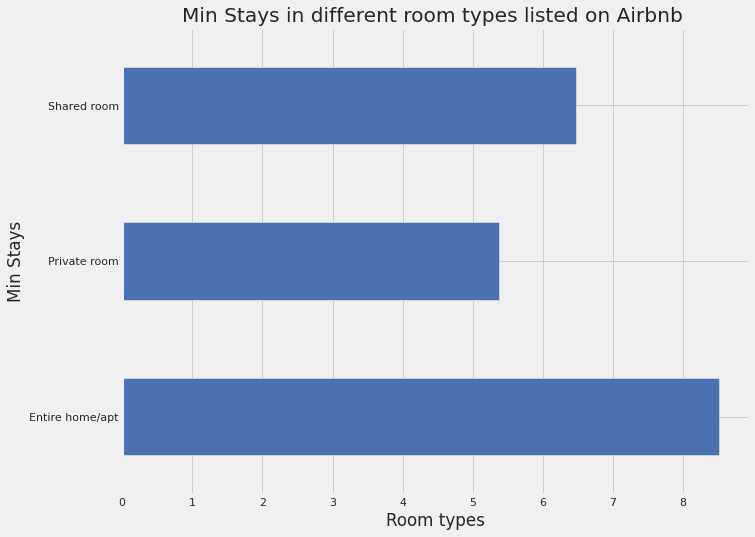

In [ ]:
airbnb.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='b')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Room types')
plt.ylabel('Min Stays')

So Entire home apartment people spend more nights and if they want to stay less they prefer shared rooms.

In [ ]:
#  find the maximum(minimum nights) spending by customer across different room type
total_room=airbnb.groupby('room_type')['minimum_nights'].sum().reset_index()
room_types=total_room.sort_values('minimum_nights',ascending=True)
room_types.head()

room_type  minimum_nights
2      Shared room            7511
1     Private room          120067
0  Entire home/apt          216152

In [ ]:
# create dataset
labels=list(room_types['room_type'])
sizes=list(room_types['minimum_nights'])
# create color parameter
colors=['green','pink','yellow']
# create explode
explode = (0.07, 0.07, 0.07)

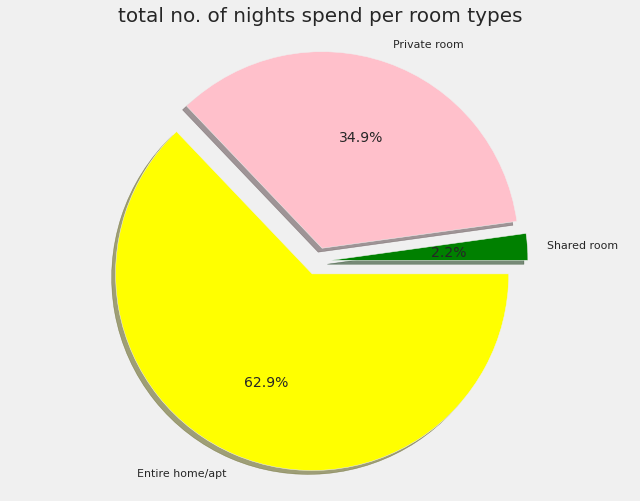

In [ ]:
#creating pie chart
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('total no. of nights spend per room types', fontsize=20)
plt.axis("equal")  
plt.show()

We plotted these to get an inference how much in percent does people like to live in different room types. So number of people loved to stay is higher in Entire room then in shared.These also says us that most people prefer to pay less price.

## correlation check

In [ ]:
corr_df=airbnb[['neighbourhood_group','neighbourhood','room_type','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]

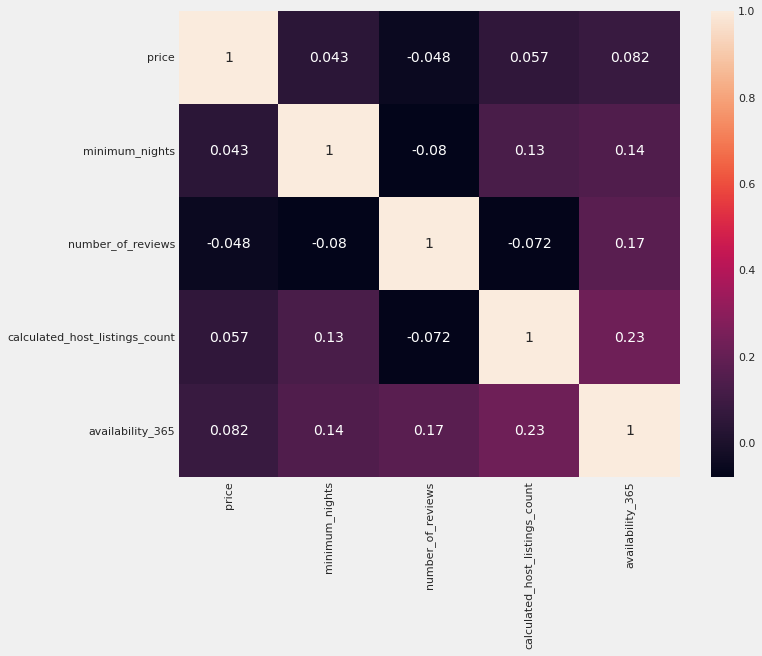

In [ ]:
sns.heatmap(corr_df.corr(),annot=True)

Here we infere that Calculated host list counts has correlation with avability 365. Also Number of reviews to avability has some relation to them. 

## Observation 9

Q2=What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
area_review=airbnb.groupby(['neighbourhood_group']).number_of_reviews.max().reset_index()  #reset_index gives another column

In [ ]:
area_review

neighbourhood_group  number_of_reviews
0               Bronx                321
1            Brooklyn                488
2           Manhattan                607
3              Queens                629
4       Staten Island                333

Text(0.5, 1.0, 'Area vs no. of review')

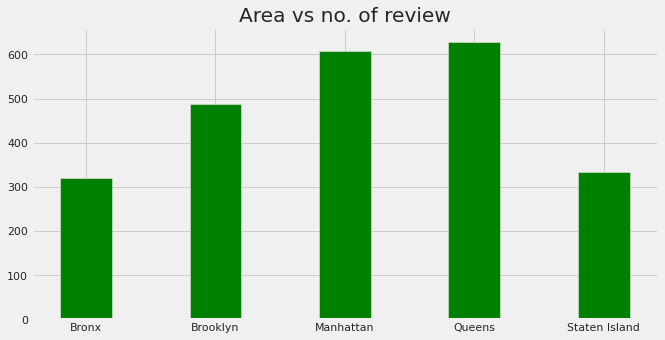

In [ ]:
#we will draw visualize on bar plot
area = area_review['neighbourhood_group']
review = area_review['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review,color ='green',width = 0.4)

plt.title('Area vs no. of review')
 

From above graph we can know abot the reviews of all areas. Queens stand highest and could infer people love to live at low prices.

## observation 10

In [ ]:
price_review =airbnb.groupby(['price']).number_of_reviews.max().reset_index()
price_review.head(10)

price  number_of_reviews
0      0                 95
1     10                 93
2     11                113
3     12                  8
4     13                  9
5     15                 19
6     16                 43
7     18                  1
8     19                 76
9     20                116

In [ ]:
#draw this on graph
review=price_review['number_of_reviews']
price=price_review['price']

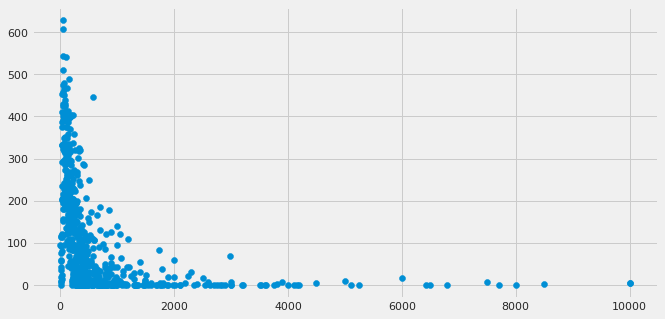

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(price,review)
plt.xlabel='price'
plt.ylabel='review'
plt.title='Price vs number of reviews'

Now we try to find the relation between different hosts and area

In [ ]:
areas = airbnb.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)

host_name neighbourhood_group  calculated_host_listings_count
13221  Sonder (NYC)           Manhattan                             327
1834     Blueground           Manhattan                             232
1833     Blueground            Brooklyn                             232
7275           Kara           Manhattan                             121
7480         Kazuya              Queens                             103

In [ ]:
top_host=airbnb.host_name.value_counts().head(10)
top_host

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

In [ ]:
top_host=pd.DataFrame(top_host)
top_host.reset_index(inplace=True)
top_host.rename(columns={'index':'host_name','host_name':'count'},inplace=True)
top_host

host_name  count
0       Michael    417
1         David    403
2  Sonder (NYC)    327
3          John    294
4          Alex    279
5    Blueground    232
6         Sarah    227
7        Daniel    226
8       Jessica    205
9         Maria    204

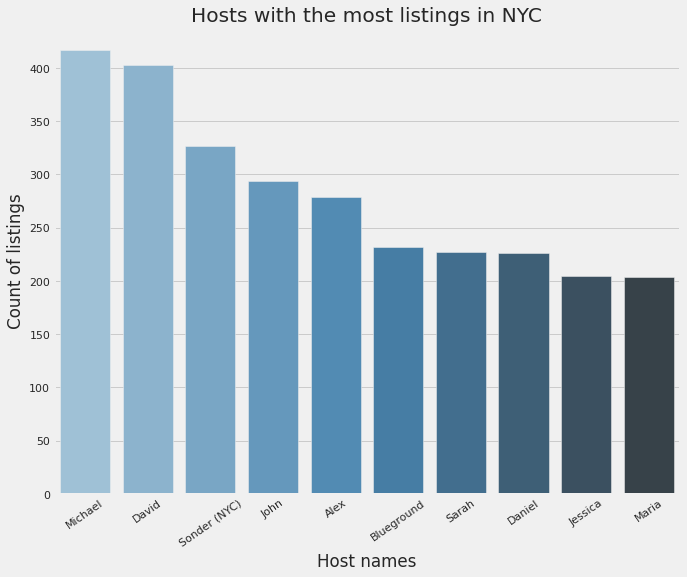

In [ ]:
fig=sns.barplot(x='host_name',y="count",data=top_host,palette='Blues_d')
fig.set_title('Hosts with the most listings in NYC')
fig.set_ylabel('Count of listings')
fig.set_xlabel('Host names')
fig.set_xticklabels(fig.get_xticklabels(), rotation=35)
sns.set_style('white')

## observation 11

In [ ]:
busy_host=airbnb.groupby(['host_name','host_id','room_type']).number_of_reviews.max().reset_index()

In [ ]:
busy_host=busy_host.sort_values(by='number_of_reviews', ascending=False).head(10)

<BarContainer object of 10 artists>

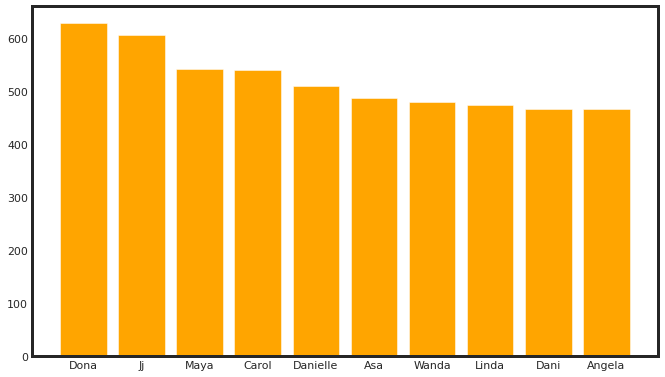

In [ ]:
name = busy_host['host_name']
reviews = busy_host['number_of_reviews']

fig=plt.figure(figsize=(10,6))

plt.bar(name,reviews, color='orange')

From above analysis we find top host like Dona, ji, Maya,Caro,Danielle and so on and top 5 booked private rooms

## Observation 12

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

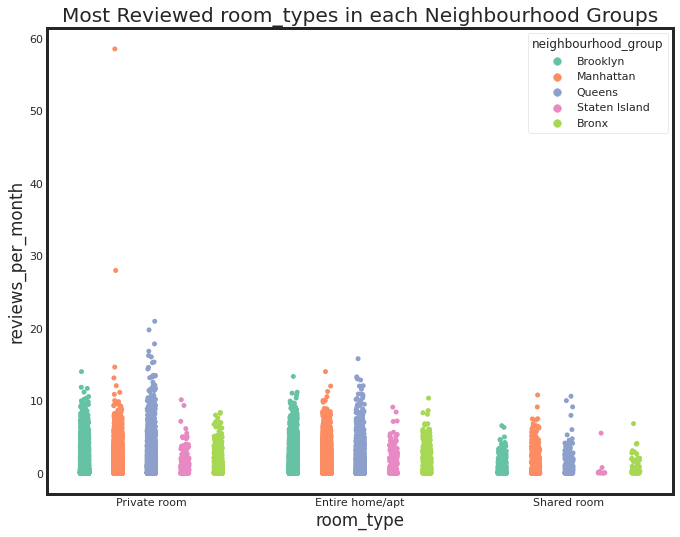

In [ ]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=airbnb,palette='Set2')
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

We can see that Private room recieved the most no of reviews/month where Manhattan had the highest reviews received for Private rooms with more than 50 reviews/month, followed by Manhattan in the chase.

Manhattan & Queens got the most no of reviews for Entire home/apt room type.

There were less reviews recieved from shared rooms as compared to other room types and it was from Staten Island followed by Bronx.

# Conclusions

1 Host_id with 219517861 has most number of listing of 300+.

2-Entire Home apartment property are more in Airbnb NYC.

3-Manhatten has highest cost of living followed by Brooklyn.

4-Manhatten is the most loved place by people in NYC.

5- We have given a map of spread of prices at various location which makes it easy for visualise the spread of room types and its rate there.

6- Manhatten has the highest Entire Apartment property list in Airbnb NYC. and Brooklyn helds the first for Private room type property.

7- Staten Island has the most vacate room in Airbnb NYC.

8- We also got to know that the avg. cost of each room type is for
Entire Home may averagely cost 150 USD . 
Private room average cost around 65 USD.

9- Most people prefer to pay less price. 

10-The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.
11- The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.

12- If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
13- If people are not staying more then one night means they are travellers.